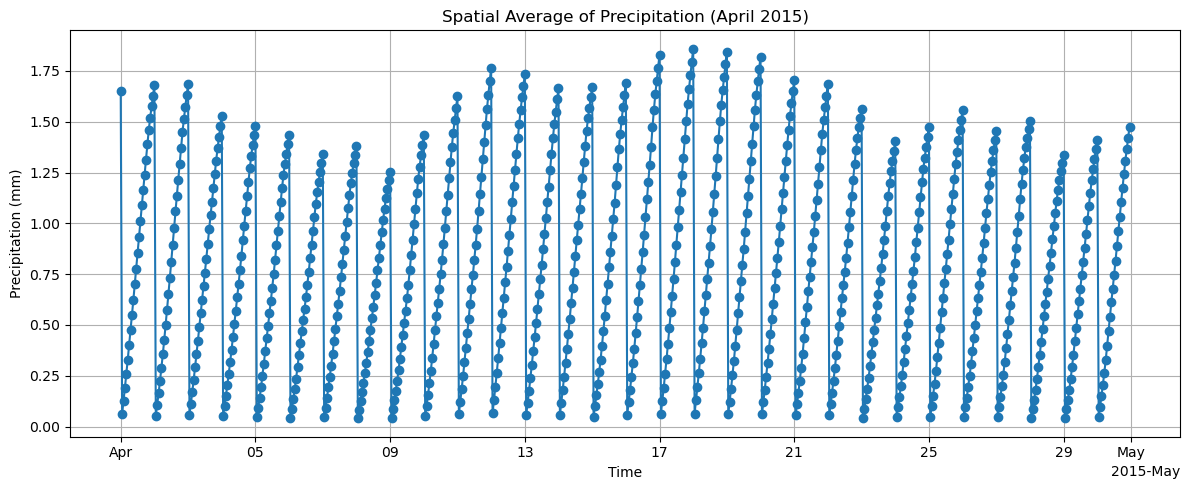

In [25]:
import xarray as xr
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/marie-audepradal/Documents/2015_04.nc"
ds = xr.open_dataset(file_path)

# Identify the correct time coordinate
time_coord = 'valid_time' if 'valid_time' in ds.coords else 'time'

# Extract tp and convert to mm (assuming unit is meters)
tp_mm = ds['tp'] * 1000

# Compute spatial average
tp_avg = tp_mm.mean(dim=['latitude', 'longitude'])

# Plot the time series
plt.figure(figsize=(12, 5))
tp_avg.plot(marker='o')
plt.title("Spatial Average of Precipitation (April 2015)")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


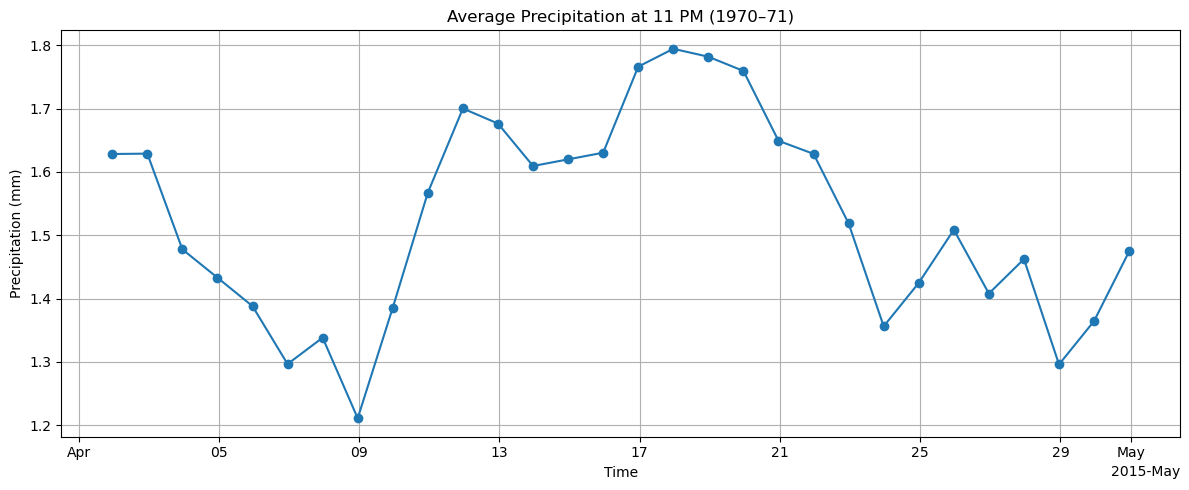

In [26]:

# Extract 11 PM time steps
ds_11pm = ds.sel({time_coord: ds[time_coord].dt.hour == 23})

# Select the precipitation variable
tp_11pm = ds_11pm['tp']

# Convert to millimeters (assuming unit is meters)
tp_11pm_mm = tp_11pm * 1000

# Average over spatial dimensions (assumes lat/lon are the names)
tp_11pm_avg = tp_11pm_mm.mean(dim=['latitude', 'longitude'])

# Plot the time series
plt.figure(figsize=(12, 5))
tp_11pm_avg.plot(marker='o')
plt.title("Average Precipitation at 11 PM (1970–71)")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
import xarray as xr

# Load dataset
file_path = "/Users/marie-audepradal/Documents/1970-2024_tpe_ERA5Land_monthly.nc"
ds = xr.open_dataset(file_path)

# Identify correct time coordinate
time_coord = 'valid_time' if 'valid_time' in ds.coords else 'time'

# Select April 2015
tp_april_2015 = ds['tp'].sel({time_coord: (ds[time_coord].dt.year == 2015) & (ds[time_coord].dt.month == 4)})

# Convert to mm (if in meters)
tp_april_2015_mm = tp_april_2015 * 1000

# Compute spatial average
tp_april_2015_avg = tp_april_2015_mm.mean(dim=['latitude', 'longitude'])

# Extract the value
tp_april_2015_value = tp_april_2015_avg.item()

# Print result
print(f"Spatial average of precipitation for April 2015: {tp_april_2015_value:.2f} mm")


Spatial average of precipitation for April 2015: 1.58 mm


How about for a particular location: such as Lima, Peru

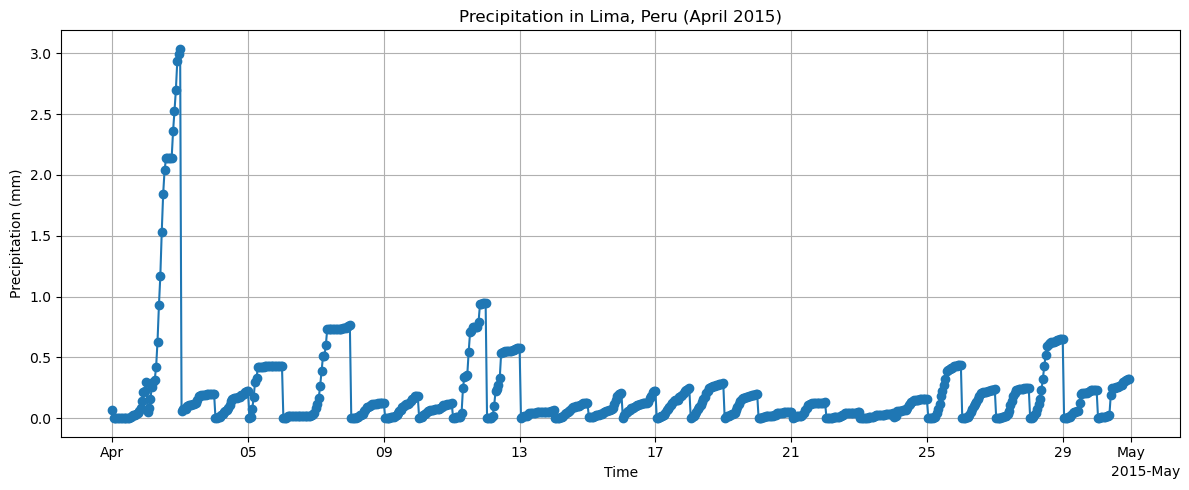

In [28]:
import xarray as xr
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/marie-audepradal/Documents/2015_04.nc"
ds = xr.open_dataset(file_path)

# Identify the correct time coordinate
time_coord = 'valid_time' if 'valid_time' in ds.coords else 'time'

# Extract tp and convert to mm (assuming unit is meters)
tp_mm = ds['tp'] * 1000

# Select the grid point closest to Lima, Peru
tp_lima = tp_mm.sel(latitude=- 12.05, longitude=360 - 77.04, method="nearest")


# Plot the time series
plt.figure(figsize=(12, 5))
tp_lima.plot(marker='o')
plt.title("Precipitation in Lima, Peru (April 2015)")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


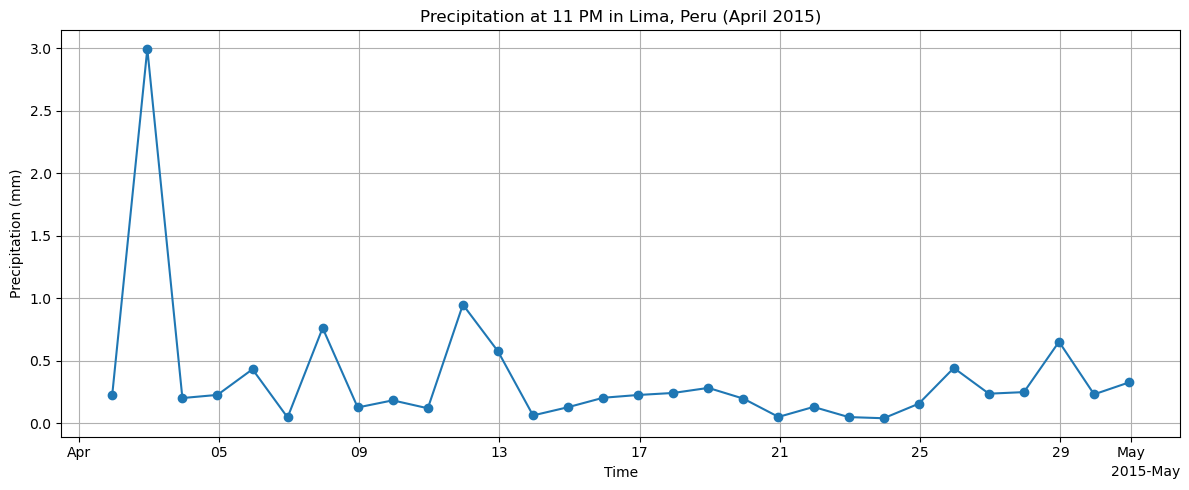

In [29]:
import xarray as xr
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/marie-audepradal/Documents/2015_04.nc"
ds = xr.open_dataset(file_path)

# Identify correct time coordinate
time_coord = 'valid_time' if 'valid_time' in ds.coords else 'time'

# Lima coordinates
lima_lat = -12.05
lima_lon = 360 - 77.04  # If longitudes are in 0–360 range

# Select nearest grid point to Lima
ds_lima = ds.sel(latitude=lima_lat, longitude=lima_lon, method='nearest')

# Filter for 11 PM time steps
ds_11pm = ds_lima.sel({time_coord: ds_lima[time_coord].dt.hour == 23})

# Convert tp to mm (assuming unit is meters)
tp_11pm_mm = ds_11pm['tp'] * 1000

# Plot the time series
plt.figure(figsize=(12, 5))
tp_11pm_mm.plot(marker='o')
plt.title("Precipitation at 11 PM in Lima, Peru (April 2015)")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import xarray as xr

# Load dataset
file_path = "/Users/marie-audepradal/Documents/1970-2024_tpe_ERA5Land_monthly.nc"
ds = xr.open_dataset(file_path)

# Identify correct time coordinate
time_coord = 'valid_time' if 'valid_time' in ds.coords else 'time'

# Lima's coordinates
lima_lat = -12.05
lima_lon = 360 - 77.04  # Use 282.96 if longitudes are in 0–360 format

# Select April 2015 for Lima grid point
tp_april_2015 = ds['tp'].sel(
    {time_coord: (ds[time_coord].dt.year == 2015) & (ds[time_coord].dt.month == 4),
     'latitude': lima_lat,
     'longitude': lima_lon},
    method='nearest'
)

# Convert to mm (if in meters)
tp_april_2015_mm = tp_april_2015 * 1000

# Extract the value
tp_april_2015_value = tp_april_2015_mm.item()

# Print result
print(f"Precipitation in Lima, Peru for April 2015: {tp_april_2015_value:.2f} mm")


Precipitation in Lima, Peru for April 2015: 0.36 mm


In [31]:
ds

<xarray.Dataset> Size: 34GB
Dimensions:     (valid_time: 660, latitude: 1801, longitude: 3600)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 5kB 1970-01-01 ... 2024-12-01
  * latitude    (latitude) float64 14kB 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * longitude   (longitude) float64 29kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
    expver      (valid_time) <U4 11kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 17GB ...
    tp          (valid_time, latitude, longitude) float32 17GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-03T14:41 GRIB to CDM+CF via cfgrib-0.9.1...

In [32]:
print(tp_april_2015.attrs)

{'GRIB_paramId': np.int64(228), 'GRIB_dataType': 'fc', 'GRIB_numberOfPoints': np.int64(6483600), 'GRIB_typeOfLevel': 'surface', 'GRIB_stepUnits': np.int64(1), 'GRIB_gridType': 'regular_ll', 'GRIB_uvRelativeToGrid': np.int64(0), 'GRIB_NV': np.int64(0), 'GRIB_Nx': np.int64(3600), 'GRIB_Ny': np.int64(1801), 'GRIB_cfName': 'unknown', 'GRIB_cfVarName': 'tp', 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid', 'GRIB_iDirectionIncrementInDegrees': np.float64(0.1), 'GRIB_iScansNegatively': np.int64(0), 'GRIB_jDirectionIncrementInDegrees': np.float64(0.1), 'GRIB_jPointsAreConsecutive': np.int64(0), 'GRIB_jScansPositively': np.int64(0), 'GRIB_latitudeOfFirstGridPointInDegrees': np.float64(90.0), 'GRIB_latitudeOfLastGridPointInDegrees': np.float64(-90.0), 'GRIB_longitudeOfFirstGridPointInDegrees': np.float64(0.0), 'GRIB_longitudeOfLastGridPointInDegrees': np.float64(359.9), 'GRIB_missingValue': np.float64(3.4028234663852886e+38), 'GRIB_name': 'Total precipitation', 'GRIB_shortName': 'tp'

List of countries of interest
Brazil
Chile
Colombia
Egypt
India
Indonesia
Kenya
Mexico
Peru
Philippines
South Africa
Thailand

In [33]:
import xarray as xr

# Load the NetCDF file for 23:00 time steps in April 2015
file_path = "/Users/marie-audepradal/Documents/tp_2015_04_z23.nc"
try:
    ds_z23 = xr.open_dataset(file_path)
    ds_z23
except FileNotFoundError:
    ds_z23 = None
    "The file was not found. Please check the path and try again."


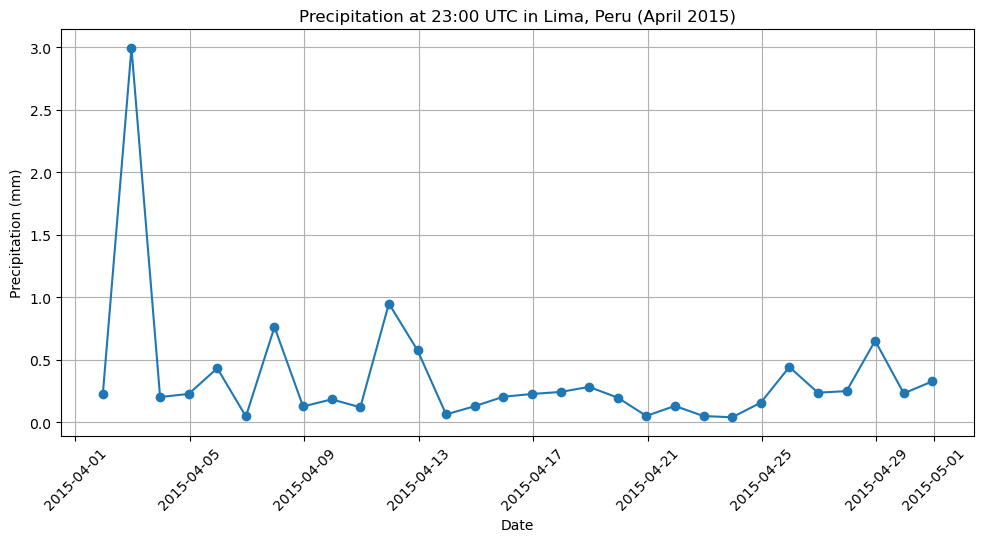

In [34]:
# Re-import necessary libraries after code execution environment reset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Reload the uploaded file
file_path = "/Users/marie-audepradal/Documents/tp_2015_04_z23.nc"
ds_z23 = xr.open_dataset(file_path)

# Lima's coordinates
lima_lat = -12.05
lima_lon = 360 - 77.04  # Use 282.96 if longitudes are in 0–360 format


# Find nearest grid point
lat_idx = np.abs(ds_z23.latitude - lima_lat).argmin().item()
lon_idx = np.abs(ds_z23.longitude - lima_lon_360).argmin().item()

# Extract time series of tp at Lima's location
tp_lima = ds_z23.tp[:, lat_idx, lon_idx] * 1000  # convert to mm
time = ds_z23.valid_time

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(time, tp_lima, marker='o')
plt.title("Precipitation at 23:00 UTC in Lima, Peru (April 2015)")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [36]:
import cdsapi

dataset = "derived-era5-land-daily-statistics"
request = {
    "variable": ["2m_temperature"],
    "year": "2024",
    "month": "01",
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "daily_statistic": "daily_mean",
    "time_zone": "utc+00:00",
    "frequency": "1_hourly"
}

client = cdsapi.Client()
client.retrieve(dataset, request, "mean_temp_jan2024.nc")

#client.retrieve(dataset, request).download()


2025-06-10 03:16:08,264 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


KeyboardInterrupt: 